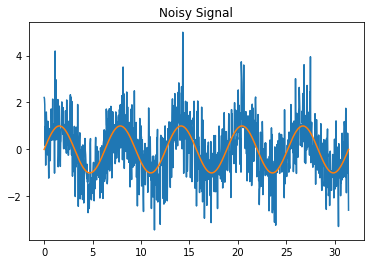

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
np.random.seed(123456789)

tspan =  np.linspace(0, 10*np.pi, 1000) 
teval = 0
Vin = lambda t: np.sin(t)
mynoise = 1*np.random.randn(*Vin(tspan).shape)
Vinarray = Vin(tspan) + mynoise

plt.plot(tspan, Vinarray)
plt.plot(tspan, Vin(tspan))
plt.title("Noisy Signal")
plt.show()

In [2]:
tau = 1
tau2 = 1
#Used to find t with the scipy integraton
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx

In [3]:
#filters
def lowpass(t, y):  
    dydt = (1/tau)*(Vinarray[find_nearest(tspan, t)]-y)
    return dydt

def highpass(t, y):
    dydt = (Vinarray[find_nearest(tspan, t)]+Vinarray[find_nearest(tspan, t)-1])/(tspan[find_nearest(tspan, t)]-tspan[find_nearest(tspan, t)-1])-y/tau
    return dydt   

def bandpass(t, y):
    low = solve_ivp(lambda t, y: lowpass(t, y),[tspan[0], tspan[-1]],[0], t_eval=tspan)
    dydt = (low.y[0,find_nearest(tspan, t)]+low.y[0, find_nearest(tspan, t)-1])/(tspan[find_nearest(tspan, t)]-tspan[find_nearest(tspan, t)-1])-y/tau2
    return dydt  


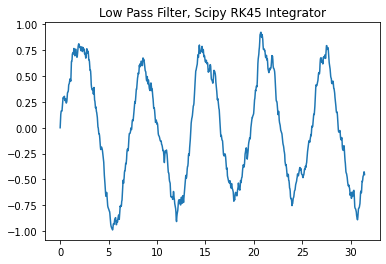

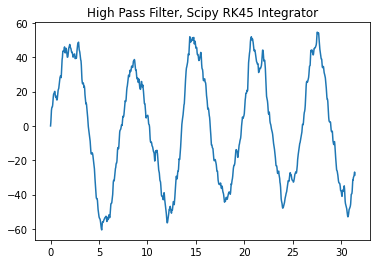

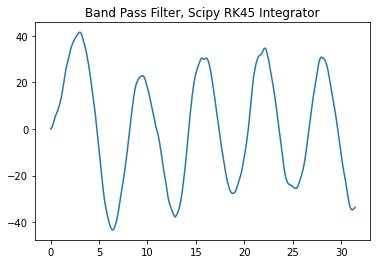

In [4]:
sol_low = solve_ivp(lambda t, y: lowpass(t, y),[tspan[0], tspan[-1]],[0], t_eval=tspan)
plt.plot(sol_low.t, sol_low.y[0,:])
plt.title("Low Pass Filter, Scipy RK45 Integrator")
plt.show()

sol_high = solve_ivp(lambda t, y: highpass(t, y),[tspan[0], tspan[-1]],[0], t_eval=tspan)
plt.plot(sol_high.t, sol_high.y[0,:])
plt.title("High Pass Filter, Scipy RK45 Integrator")
plt.show()

sol_band = solve_ivp(lambda t, y: bandpass(t, y),[tspan[0], tspan[-1]],[0], t_eval=tspan)
plt.plot(sol_band.t, sol_band.y[0,:])
plt.title("Band Pass Filter, Scipy RK45 Integrator")
plt.show()